# Antarctic Boundaries from MEaSUREs

**Description:** Various shapes from MEaSUREs boundaries datasets, such as the coastline, ice catchment basins, ice shelves.

Requires an EarthData login, see [link](../../tutorial/fetch_walkthrough.ipynb) for how to configure this. 

**Dataset:** 

Mouginot, J., B. Scheuchl, and E. Rignot. “MEaSUREs Antarctic Boundaries for IPY 2007-2009 from Satellite Radar, Version 2.” National Snow and Ice Data Center, 2017. https://nsidc.org/data/nsidc-0709/versions/2.


**Associated paper:**
 
N.A.

In [1]:
%%capture
%load_ext autoreload
%autoreload 2

from polartoolkit import fetch, maps, regions

In [2]:
version_names = [
    "Coastline",
    "Basins_Antarctica",
    "Basins_IMBIE",
    "IceBoundaries",
    "IceShelf",
    # "Mask", # not interesting to plot
]

filepaths = []
for name in version_names:
    filepaths.append(
        fetch.antarctic_boundaries(
            version=name,
        )
    )

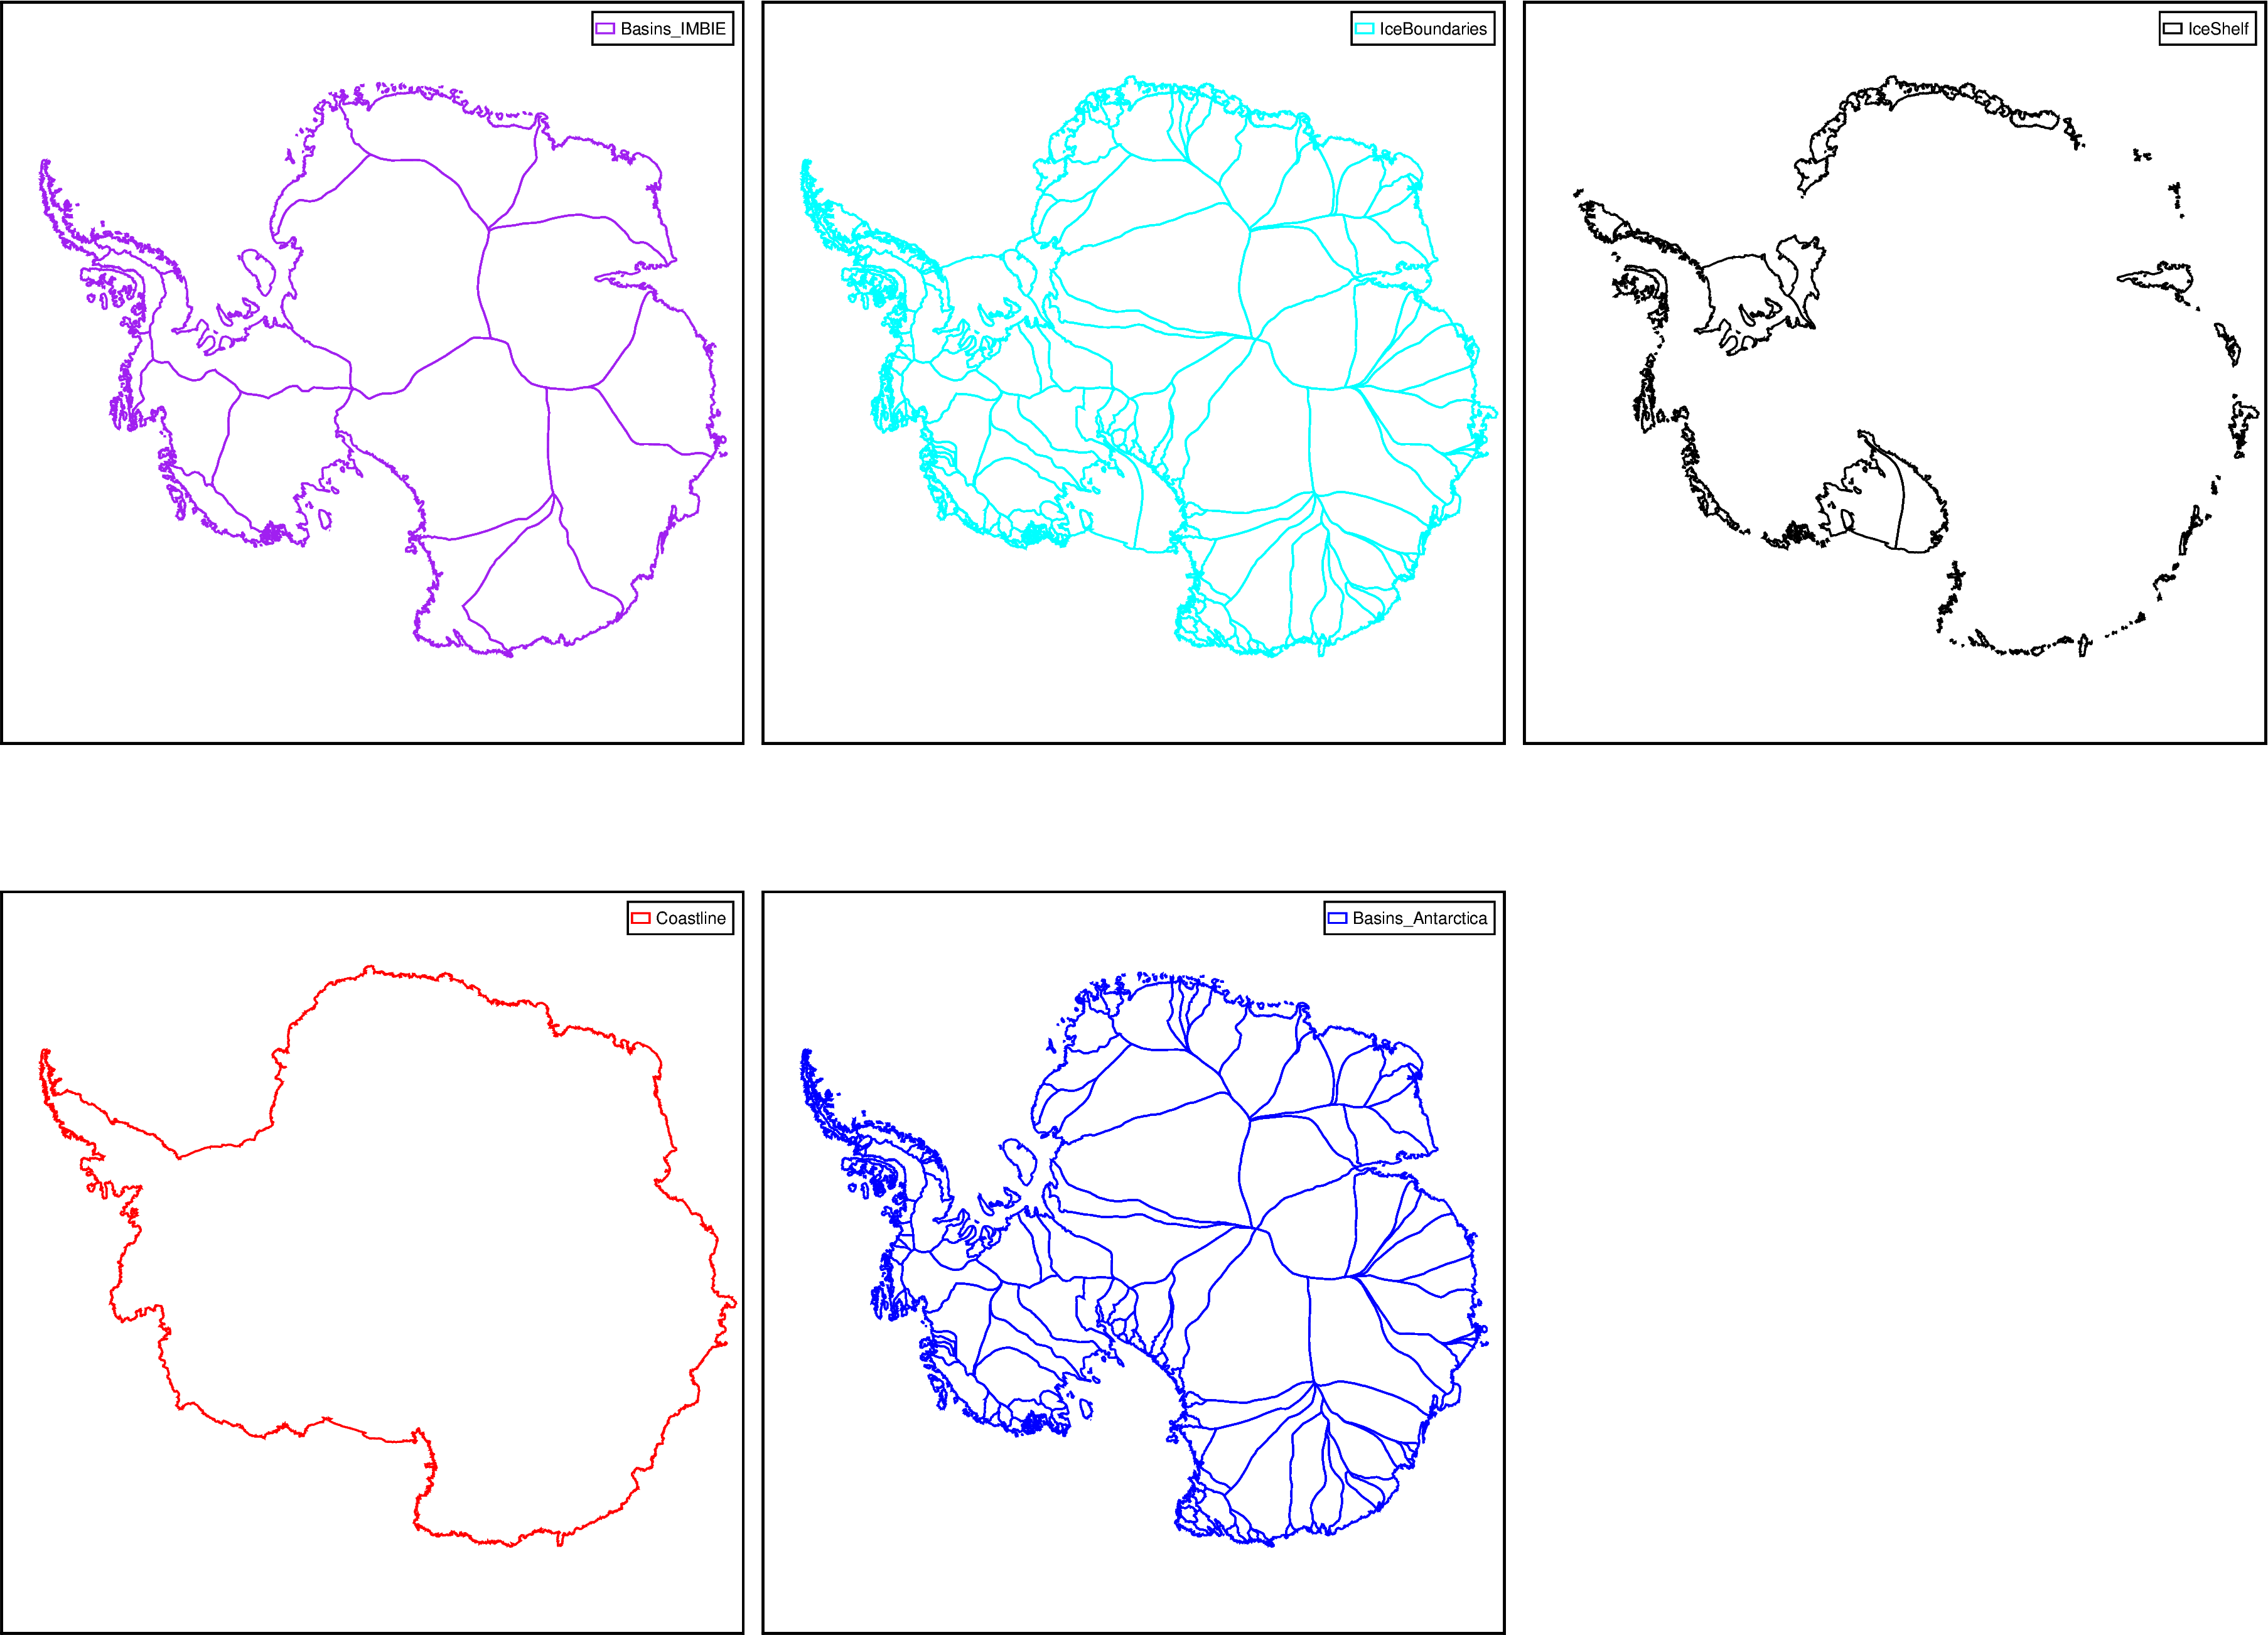

In [3]:
colors = ["red", "blue", "purple", "cyan", "black"]
for i, v in enumerate(version_names):
    # determine subplot shifts
    xshift_amount = 1
    if i == 0:
        origin_shift = "initialize"
        fig = None
    elif i == 1:
        origin_shift = "xshift"
    elif i == 2:
        origin_shift = "both_shift"
        xshift_amount = -1
    elif i == 3 or i == 4:
        origin_shift = "xshift"

    # plot the data
    fig = maps.basemap(
        region=regions.antarctica,
        hemisphere="south",
        origin_shift=origin_shift,
        xshift_amount=xshift_amount,
        fig=fig,
    )
    fig.plot(
        filepaths[i],
        pen=f"1p,{colors[i]}",
        label=v,
    )
    fig.legend()

fig.show(dpi=200)